In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

In [2]:
#from google.colab import drive

#drive.mount('/content/drive')

## Loading data frame

In [3]:
#isabelles data path:
# data_path = '/content/drive/My Drive/Colab Notebooks/cars_files/'
#isabelles data load
# df = pd.read_csv(data_path + 'copy_sample.csv', parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')

In [4]:
# caitlin's local file path
data_path = 'C:/Users/Caitlin/Documents/DataScience/WIMLDS/cleaned/'
df = pd.read_csv(data_path + 'sample.csv', parse_dates=['TEST_SDATE','TEST_EDATE'], lineterminator='\n')

C:\Users\Caitlin\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (5,7,18,26,108,109,113) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



## Target variable, reduce

In [5]:
list(df)

['RecordID',
 'RECORD_NUM',
 'VIR_CERT_NUMBER',
 'STATION_NUM',
 'ANALYZER_NUM',
 'INSPECTOR_NUM',
 'TEST_TYPE',
 'VID_TEST_TYPE',
 'TEST_SDATE',
 'TEST_EDATE',
 'VIN',
 'VIN_SOURCE',
 'VEH_LICENSE',
 'GVW_TYPE',
 'GVWR',
 'MODEL_YEAR',
 'MAKE',
 'MODEL',
 'CYL',
 'ENGINE_SIZE',
 'TRANS_TYPE',
 'DUAL_EXHAUST',
 'ODOMETER',
 'FUEL_TYPE',
 'VEHICLE_TYPE',
 'EMISS_COST',
 'ZIP_CODE',
 'CERTIFICATION',
 'ESC',
 'VRT_RECORD_ID',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_

In [6]:
keep_cols = ['VIR_CERT_NUMBER', 'STATION_NUM', 'ANALYZER_NUM', 'INSPECTOR_NUM', 'TEST_SDATE', 'TEST_EDATE', 'VIN', 'VIN_SOURCE',
             'VEH_LICENSE', 'GVW_TYPE', 'GVWR', 'MODEL_YEAR', 'MAKE', 'MODEL', 'CYL', 'ENGINE_SIZE', 'TRANS_TYPE', 
             'DUAL_EXHAUST', 'ODOMETER', 'FUEL_TYPE', 'VEHICLE_TYPE', 'ZIP_CODE', 'CERTIFICATION', 'ESC', 'VRT_RECORD_ID', 
             'ABORT_CODE', 'SOFTWARE_VERSION', 'INSP_COMMENTS', 'OVERALL_RESULT', 'ABORT_CODE_OTHER_DESC', 'MECHANIC_LAST_NAME',
             'MECHANIC_FIRST_NAME', 'MECHANIC_MIDDLE_INIT', 'ENGINE_SIZE_ORIG', 'VID_TEST_TYPE']

df = df[keep_cols]

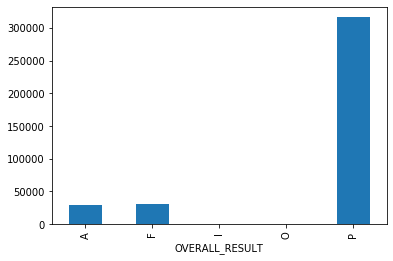

In [7]:
df.groupby('OVERALL_RESULT').size().plot.bar()

In [8]:
df.OVERALL_RESULT.value_counts()

P    316732
F     30051
A     28701
O        10
I         9
Name: OVERALL_RESULT, dtype: int64

In [9]:
df = df[df.OVERALL_RESULT.isin(['P', 'F', 'A'])]

##### Select only pass & fail

In [10]:
df = df[(df.OVERALL_RESULT == 'P')|(df.OVERALL_RESULT=='F')]

##### Create age variable

In [11]:
df['AGE'] = pd.to_datetime(df["TEST_EDATE"]).dt.year - df["MODEL_YEAR"]

In [12]:
df['AGE'] += 1

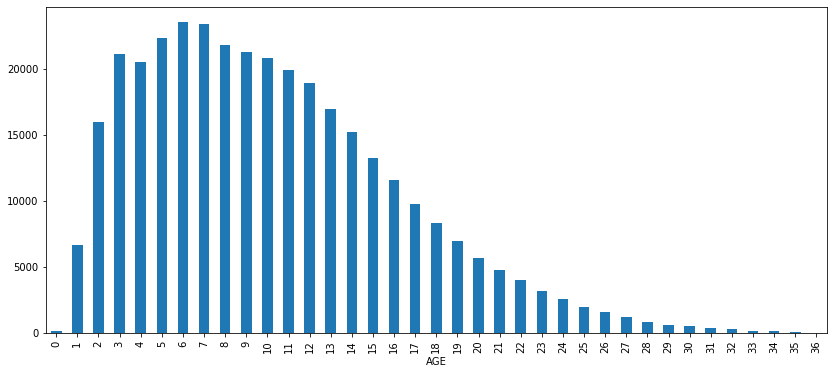

In [13]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('AGE').size().plot.bar()

## Checkout VINs

In [14]:
len(df.VIN.unique())

127791

In [15]:
len(df)

346783

In [16]:
print(f'Out of {len(df)} entries in the system, {len(df)-len(df.VIN.unique())}, or {round((len(df)-len(df.VIN.unique()))/len(df), 4)*100}% are in there more than once.')

Out of 346783 entries in the system, 218992, or 63.14999999999999% are in there more than once.


### To do

#### Compare the number of times the car has been tested with the age of the car

#### Compare the number of times the car has been tested with Pass/Fail

In [55]:
df['NUM_VISITS'] = df.VIN.groupby(df.VIN).transform('count')

0          1
1          1
3         11
4          3
5          1
          ..
375498     3
375499     3
375500     4
375501     5
375502     5
Name: VIN, Length: 346783, dtype: int64

In [56]:
len(df[df['NUM_VISITS']>1]), len(df[df['NUM_VISITS']==1])

(294484, 52299)

In [79]:
# get number of pass/fail for each car
# df['NUM_PASS'] = df.VIN.groupby(df.VIN, df.OVERALL_RESULT=='P').transform('count'))

In [104]:
test = df.groupby('VIN')['OVERALL_RESULT'].value_counts().unstack().fillna(0)

In [105]:
#test

In [106]:
test2= test.reset_index()

In [107]:
test2

OVERALL_RESULT,VIN,F,P
0,0F1AC4222PB200660,0.0,1.0
1,0FMCU93158KD84024,0.0,1.0
2,0N1BC11E69L466681,0.0,1.0
3,0N8AR05SXVW181282,0.0,1.0
4,0S4BP62C377301194,0.0,1.0
...,...,...,...
127786,ZFFYR51A3X0116639,3.0,0.0
127787,ZFFYR51R9X0118072,1.0,0.0
127788,ZFFYT53A310122964,0.0,2.0
127789,ZHWGU12T36LA03105,1.0,5.0


In [108]:
df2 = pd.merge(df,test2, on='VIN')

In [109]:
df2=df2.rename(columns=({'F':'NUM_FAIL', 'P':'NUM_PASS'}))

In [110]:
len(df2)

346783

In [113]:
# will keep 1 copy from the duplicates that are there. It keeps the last one that it finds.
# would be more informative to first sort the dataframe by VIN & NUM_VISITS, and have it 
# keep the last entry for each car.
df2 = df2.sort_values(by=['VIN', 'NUM_VISITS'])

In [114]:
df3=df2.drop_duplicates('VIN', keep='last')

In [115]:
df3.head()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE,AGE,NUM_VISITS,NUM_FAIL,NUM_PASS
99859,5053210.0,IR277,W094,2627911,2006-11-29 07:49:00,2006-11-29 07:55:00,0F1AC4222PB200660,S,HNX846,1.0,3000,1993,SUBARU,LOYALE,4,1800,M,N,128300,G,1,87102,F,5.0,930227,NaN,158,NaN,P,NaN,TRUDEN,LOUIS,A,NaN,I,14,1,0.0,1.0
313048,7610529.0,IS407,W102,AC083899,2016-05-22 13:14:00,2016-05-22 13:15:00,0FMCU93158KD84024,S,MYK742,1.0,3375,2008,FORD,ESCAPE,6,3000,A,N,112414,G,4,87111,C,20.0,0,NaN,503,NaN,P,NaN,Lee,William,D,NaN,I,9,1,0.0,1.0
318309,7740581.0,IS498,W028,AC084941,2016-10-29 15:30:00,2016-10-29 15:31:00,0N1BC11E69L466681,S,LBX368,1.0,0,2009,NISSAN,VERSA,4,1800,A,N,122304,G,1,87121,C,6.0,0,NaN,503,NaN,P,NaN,BUTTERWORTH,QUENTIN,R,1.8L,I,8,1,0.0,1.0
45063,4604724.0,IS212,W111,33191251,2005-05-20 16:13:00,2005-05-20 16:19:00,0N8AR05SXVW181282,S,153JWZ,1.0,4850,1997,NISSAN,PATHFINDER,6,3300,A,N,90478,G,4,87112,F,20.0,970357,NaN,147,NaN,P,NaN,CROWSON,GARY,L,NaN,I,9,1,0.0,1.0
271567,6973938.0,IS364,W061,AC084367,2013-07-13 15:03:00,2013-07-13 15:05:00,0S4BP62C377301194,S,LBP806,1.0,3875,2007,SUBARU,OUTBACK,4,2500,A,N,93475,G,2,87114,C,6.0,0,NaN,501,NaN,P,NaN,Ewing,Anthony,M,NaN,I,7,1,0.0,1.0


In [118]:
# add proportion pass
df3['PROP_PASS'] = df3['NUM_PASS']/df3['NUM_VISITS']

C:\Users\Caitlin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


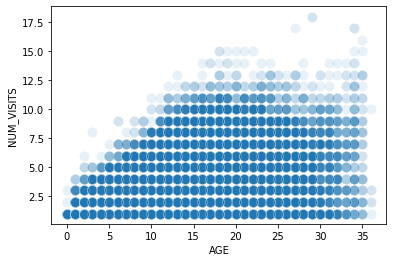

In [124]:
sns.scatterplot(x='AGE', y='NUM_VISITS', s=100, alpha=.1, data=df3)

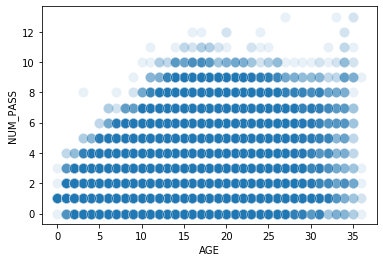

In [125]:
sns.scatterplot(x='AGE', y='NUM_PASS', s=100, alpha=.1, data=df3)

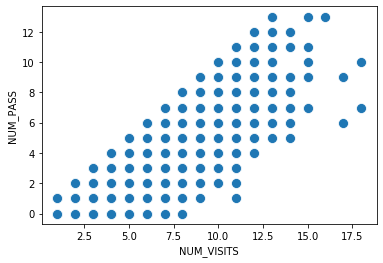

In [132]:
sns.scatterplot(x='NUM_VISITS', y='NUM_PASS', s=100, data=df3)

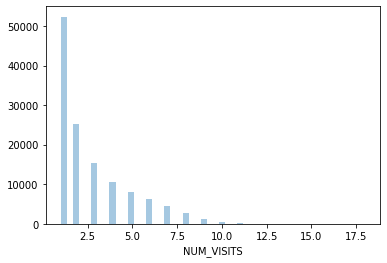

In [131]:
sns.distplot(df3['NUM_VISITS'], kde=False)

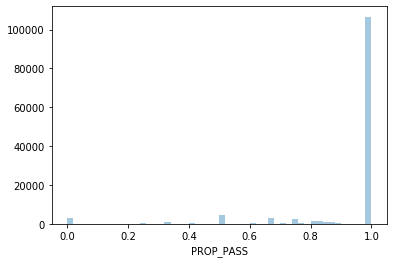

In [130]:
sns.distplot(df3['PROP_PASS'], kde=False)

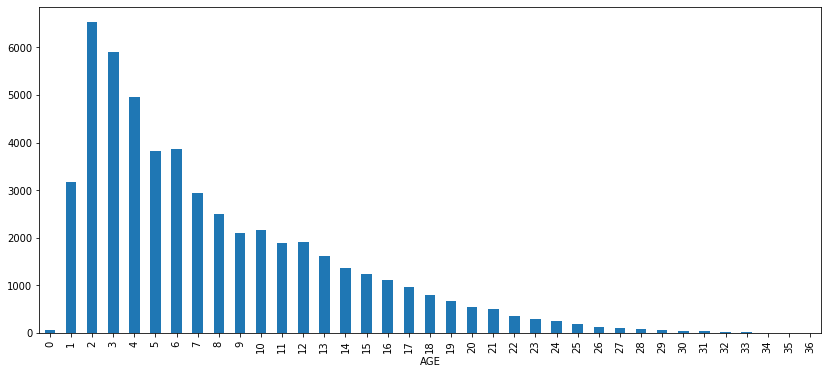

In [32]:
fig, ax = plt.subplots(figsize=(14,6))
df_unique_vins.groupby('AGE').size().plot.bar()

The cars who have only been checked once tend to be newer cars, although we do see some older cars. The older cars are likely used cars from outside Bernalillo county. 

Important to note is the nearly expontential decline in age.

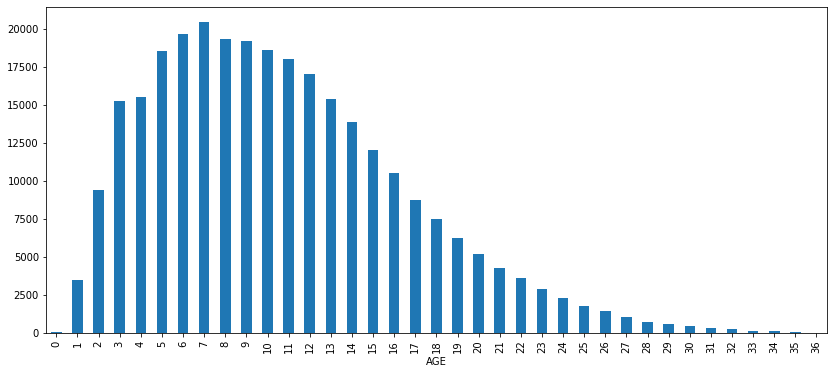

In [53]:
fig, ax = plt.subplots(figsize=(14,6))
df[df['NUM_VISITS']>1].groupby('AGE').size().plot.bar()

With the cars that have been tested more than once, we see that they follow the same distribution as when they were all combined.

In [44]:
# Want to plot age of the car with how many times it has been tested. 
# x = number of times tested
# y = age
# how to get number of times tested? 
# test = df_nonunique_vins['VIN'].value_counts()



## Look at aborted tests

In [0]:
abort_df = df[df.OVERALL_RESULT == 'A']
abort_df[['ABORT_CODE', 'ABORT_CODE_OTHER_DESC']]

,ABORT_CODE,ABORT_CODE_OTHER_DESC
2,99.0,NaN
27,99.0,NaN
47,99.0,wrong vin
54,99.0,NaN
59,99.0,NaN
...,...,...
234961,99.0,NaN
234968,99.0,NaN
234997,13.0,NaN
235045,99.0,NaN


In [0]:
print(set(abort_df.ABORT_CODE.values))

{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 13.0, nan, nan, nan, 17.0, nan, nan, 20.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 40.0, nan, nan, nan, nan, nan, nan, 99.0}


In [0]:
abort_df[abort_df.ABORT_CODE_OTHER_DESC.notna()].ABORT_CODE_OTHER_DESC

47                              wrong vin
154                no adaptor for gas cap
190                               MISFIRE
216       OBDII Secondary Readiness Abort
241                             wrong key
                       ...               
234486                 WRONG PLATE NUMBER
234636          NO COMMUNICATION WITH DLC
234646            obdII not communicating
234661                   OBD2 NOT READING
234749                     ALREADY TESTED
Name: ABORT_CODE_OTHER_DESC, Length: 2033, dtype: object

#### There are 2033 datapoints with additional information on why the check was aborted. There might be valuable information for understanding how the checks work in general

In [0]:
abort_df.isnull()#.any()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True
27,True,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False,True,True,False,True,False,True,True,True,False,False,False,True,False,True,False,False,True,True,True
47,True,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,True,False,True,False,True,True,True,False,False,False,True,False,False,False,False,False,True,True
54,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,True
59,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234961,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True
234968,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True
234997,True,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False,True,True,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,True,True
235045,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False


In [0]:
df[df.OVERALL_RESULT != 'A'].isnull()#.any()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False
235172,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False
235173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False
235174,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False


In [0]:
abort_df[abort_df.VIR_CERT_NUMBER.isna()]

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
2,NaN,IR354,W109,32641547,2004-08-31 13:03:00,2004-08-31 13:03:00,KNJBT06K2K6116760,M,NP116760,1.0,2000,1989,FORD,FESTIVA,4,1300,M,N,110347,G,1,87108,F,4.0,890199,99.0,140.0,NaN,A,NaN,Anderson,Phillip,L,NaN,NaN
27,NaN,IS196,W104,8060417,2004-10-31 12:16:00,2004-10-31 12:16:00,JT4RN62D5G0084290,M,906,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,99.0,141.0,NaN,A,NaN,HICKS,JOHN,NaN,NaN,NaN
47,NaN,IS309,W078,11714840,2004-11-06 11:25:00,2004-11-06 11:25:00,KMHVD14N1XU452074,S,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,99.0,141.0,NaN,A,wrong vin,ANDERSON,MICHAEL,S,NaN,NaN
54,NaN,IR250,19,39864363,2004-12-20 14:30:00,2004-12-20 14:30:00,1G2JB124927101864,S,NP101864,NaN,3000,2002,PONTIAC,SUNFIRE,4,2200,A,N,83781,G,1,87110,N,6.0,0,99.0,147.0,NaN,A,NaN,Betanco,Max,NaN,NaN,NaN
59,NaN,IR061,W007,36720077,2004-07-09 11:15:00,2004-07-09 11:15:00,1FTRW07352KC64831,S,NPC64831,NaN,6700,2002,FORD,F150 SUPER CAB - SHOR,8,5400,A,N,11583,G,3,87105,F,20.0,0,99.0,140.0,NaN,A,NaN,SHETTER,RICHARD,NaN,5.4L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234961,NaN,IR317,W066,37826481,2014-04-25 17:56:00,2014-04-25 17:56:00,KNDJB7234Y5659020,S,121PKB,NaN,3375,2000,KIA,SPORTAGE,4,2000,A,N,162927,G,4,87108,F,20.0,20000374,99.0,502.0,NaN,A,NaN,NGUYEN,HANH,A,NaN,NaN
234968,NaN,IS296,W050,AC083802,2014-06-19 09:53:00,2014-06-19 09:53:00,JTEBT14R240036403,S,GKH815,NaN,5710,2004,TOYOTA,4RUNNER 4WD,8,4700,A,N,126071,G,4,87120,C,20.0,20040527,99.0,502.0,NaN,A,NaN,SANDOVAL,RICHARD,A,NaN,NaN
234997,NaN,IR303,W054,AC083856,2014-04-22 14:20:00,2014-04-22 14:20:00,KMHFG4JG2CA150372,S,NP150372,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,13.0,502.0,NaN,A,NaN,SALAZAR,ISAAC,J,NaN,NaN
235045,NaN,IS341,W021,32480268,2014-10-23 11:32:00,2014-10-23 11:32:00,JA4FN44L1JA006922,M,JDT697,1.0,5650,1988,MITSUBISHI,VAN,4,2400,A,N,232870,G,5,87102,F,10.0,880506,99.0,502.0,NaN,A,NaN,MIRABAL,ROSALIA,C,NaN,I


#### Nearly all the aborted tests have no VIR

## What is VIR?

In [0]:
df[df.OVERALL_RESULT == 'F'].VIR_CERT_NUMBER

6         4454540.0
10        4458737.0
20        4411006.0
46        4437436.0
48        4427570.0
            ...    
235113    7249895.0
235118    7290476.0
235139    7271639.0
235152    7288664.0
235158    7215901.0
Name: VIR_CERT_NUMBER, Length: 20352, dtype: float64

In [0]:
df.sort_values(['TEST_SDATE', 'VIR_CERT_NUMBER'])

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
5246,4400108.0,IS329,WO36,21628635,2004-05-03 16:13:00,2004-05-03 16:16:00,1FAFP52U1WA230450,S,CLL409,1.0,3625,1998,FORD,TAURUS,6,3000,A,N,88982,G,1,87107,F,6.0,0,NaN,132.0,NaN,P,NaN,Sanchez,Leroy,NaN,3.0L,I
9093,4400130.0,IS329,WO36,26351553,2004-05-04 10:48:00,2004-05-04 10:53:00,1B7FL23X0PS278269,M,102FDG,1.0,5000,1993,DODGE,DAKOTA,6,3900,A,N,112376,G,3,87109,F,11.0,930085,NaN,132.0,NaN,P,NaN,Sanchez,Tim,NaN,NaN,I
3337,4400131.0,IS329,WO36,26351553,2004-05-04 10:55:00,2004-05-04 10:57:00,2MELM75W9VX659371,S,819KYX,1.0,4000,1997,MERCURY,GRAND MARQUIS,8,4600,A,N,39121,G,1,87107,F,6.0,970160,NaN,132.0,NaN,P,NaN,Sanchez,Tim,NaN,NaN,I
7975,4400134.0,IS329,WO36,26351553,2004-05-04 11:16:00,2004-05-04 11:21:00,J81RF2366P7512165,S,987JWZ,1.0,2625,1993,GEO,STORM,4,1600,M,N,131174,G,1,87105,F,5.0,930393,NaN,132.0,NaN,P,NaN,Sanchez,Tim,NaN,NaN,I
6509,4400141.0,IS329,WO36,26351553,2004-05-04 12:52:00,2004-05-04 13:03:00,2GCEK19K8P1173368,S,DTP074,2.0,6600,1993,CHEVROLET,C1500 PICKUP,8,5700,M,N,117314,G,3,87107,F,16.0,930305,NaN,132.0,NaN,P,NaN,Sanchez,Tim,NaN,NaN,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233074,10064534.0,IS478,W167,AC083912,2014-12-31 09:33:00,2014-12-31 09:36:00,2C3AE66G42H266556,S,110GWB,1.0,3875,2002,CHRYSLER,300 M,6,3500,A,N,122410,G,1,87120,C,6.0,20020047,NaN,502.0,NaN,P,NaN,Valdez,Clarence,R,NaN,I
233840,10062604.0,IR363,W035,AC084339,2014-12-31 10:09:00,2014-12-31 10:12:00,5FNYF28477B025994,S,NP025994,1.0,5840,2007,HONDA,PILOT,6,3500,A,N,75061,G,4,87114,C,20.0,0,NaN,502.0,NaN,P,NaN,Hidalgo,Wilfred,G,NaN,I
233048,10059073.0,IS425,W098,21369207,2014-12-31 10:55:00,2014-12-31 10:56:00,5TETX22N56Z187774,S,CJJ304,1.0,4850,2006,TOYOTA,TACOMA 2WD,4,2700,M,N,42706,G,3,87110,C,20.0,0,NaN,502.0,NaN,P,NaN,LOPEZ,CAMILO,D,NaN,I
233603,10065223.0,IS494,W072,AC084392,2014-12-31 11:07:00,2014-12-31 11:10:00,2G1WF55E1Y9212796,S,522RYA,1.0,3750,2000,CHEVROLET,IMPALA,6,3400,A,N,161103,G,1,87111,N,6.0,20000272,NaN,502.0,NaN,P,NaN,Mooney,Kevin,S,NaN,I


#### Aborted tests generate no report. Is it ok to simply exclude them from our dataset? 

In [0]:
df_w_abort = df
df = df[df.OVERALL_RESULT != 'A']

## Look at the date information

### by date

In [0]:
df['SDATE'] = df.TEST_SDATE.apply(lambda x: x.date())
df['EDATE'] = df.TEST_EDATE.apply(lambda x: x.date())

In [0]:
df['DATE_DIST'] = df.EDATE - df.SDATE

In [0]:
df[df.DATE_DIST != '0 days']

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE,SDATE,EDATE,DATE_DIST
14392,4603988.0,IR050,W079,10185203,2005-06-29 17:26:00,2005-06-30 07:42:00,JT2BG22KXW0235411,S,BG079,1.0,3500,1998,TOYOTA,CAMRY,4,2200,A,N,87000,G,1,87109,F,6.0,0,NaN,147.0,NaN,P,Test Time Expiration,VELASQUEZ,GILBERT,I,NaN,I,2005-06-29,2005-06-30,1 days
23556,4631116.0,IR282,W015,19772826,2005-09-08 16:36:00,2005-09-09 07:22:00,4S6CK58W9X4425607,S,NP425607,1.0,4700,1999,HONDA,PASSPORT,6,3500,A,N,77556,G,4,87124,F,20.0,0,NaN,150.0,NaN,F,NaN,NERI,DAVID,G,3.5L,I,2005-09-08,2005-09-09,1 days
68647,5262454.0,IR385,W121,31981,2007-08-08 23:58:00,2007-08-09 00:03:00,1FTRW07653KD84026,M,NPD84026,1.0,5001,2003,FORD,F150 2WD,8,4600,A,N,38395,G,3,87113,F,20.0,20030160,NaN,158.0,NaN,P,NaN,SANCHEZ,RAYMOND,J,NaN,I,2007-08-08,2007-08-09,1 days
82975,5082616.0,IR385,W121,46913019,2007-01-09 23:53:00,2007-01-10 00:06:00,JTEBU17R630017389,S,NP017389,1.0,5380,2003,TOYOTA,4RUNNER 4WD,6,4000,A,N,55527,G,4,87113,C,20.0,20030499,NaN,158.0,NaN,P,NaN,Valdez,John,P,NaN,I,2007-01-09,2007-01-10,1 days
114451,5632921.0,IR405,W137,AC083515,2009-06-29 06:47:00,2000-01-02 09:36:00,1GCGC29R3TE245000,M,452MCL,3.0,8600,1996,CHEVROLET,C2500 PICKUP,8,5700,M,N,187525,G,3,87114,F,20.0,961355,NaN,158.0,NaN,P,NaN,STUARD,RICKEY,J,NaN,I,2009-06-29,2000-01-02,-3466 days
123825,4824144.0,IS379,W122,8987211,2009-06-26 12:02:00,2003-03-13 03:43:00,1LNLM9742RY655060,S,501JAF,1.0,3875,1994,LINCOLN,CONTINENTAL,6,3800,A,N,100533,G,1,87122,F,5.0,940096,NaN,150.0,NaN,P,NaN,CHAVEZ,ROBERT,L,NaN,I,2009-06-26,2003-03-13,-2297 days
144867,6055173.0,IR282,W015,AC083572,2010-06-10 23:59:00,2010-06-11 00:03:00,3FAFP08Z76R162277,S,NP162277,1.0,0,2006,FORD,FUSION,4,2300,A,N,23690,G,1,87124,F,6.0,0,NaN,158.0,NaN,P,NaN,SEELYE,WARREN,R,2.3L,I,2010-06-10,2010-06-11,1 days
158747,6197234.0,IR282,W015,AC083874,2010-11-19 23:54:00,2010-11-20 00:02:00,1J4FA49S31P358635,S,NP358635,1.0,4450,2001,JEEP,WRANGLER,6,4000,M,N,91866,G,4,87124,C,20.0,20010100,NaN,202.0,NaN,P,NaN,ILLERBRUM,MATHEW,A,NaN,I,2010-11-19,2010-11-20,1 days
163360,6309487.0,IR054,W024,1816144,2011-03-29 17:07:00,2011-03-30 07:34:00,1N4BA41E77C846020,S,NP846020,1.0,3875,2007,NISSAN,MAXIMA,6,3500,A,N,16639,G,1,87110,C,6.0,0,NaN,202.0,NaN,P,NaN,JASTRAM,JONATHAN,R,NaN,I,2011-03-29,2011-03-30,1 days
165221,6346979.0,IR344,W084,48633145,2011-06-30 18:06:00,2011-07-01 07:43:00,2HGFG21517H707899,S,NP707899,1.0,0,2007,HONDA,CIVICSI,4,2000,M,N,53723,G,1,87109,C,6.0,0,NaN,203.0,NaN,F,NaN,NUNEZ,SAUL,L,2.0L,I,2011-06-30,2011-07-01,1 days


#### a tiny subset has a test phase of one day or more. it is reasonable to assume that these are nans/outliers

### by test interval

In [0]:
inter_df = df[df.DATE_DIST == '0 days']
inter_df['TEST_INTERVAL'] = inter_df.TEST_EDATE - inter_df.TEST_SDATE

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
inter_df.TEST_INTERVAL.min(), inter_df.TEST_INTERVAL.max(), inter_df.TEST_INTERVAL.mean(), inter_df.TEST_INTERVAL.median()

(Timedelta('0 days 00:00:00'),
 Timedelta('0 days 04:02:00'),
 Timedelta('0 days 00:04:26.741003'),
 Timedelta('0 days 00:04:00'))

In [0]:
inter_df['TEST_SECONDS'] = inter_df.TEST_INTERVAL.apply(lambda x: x.seconds)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


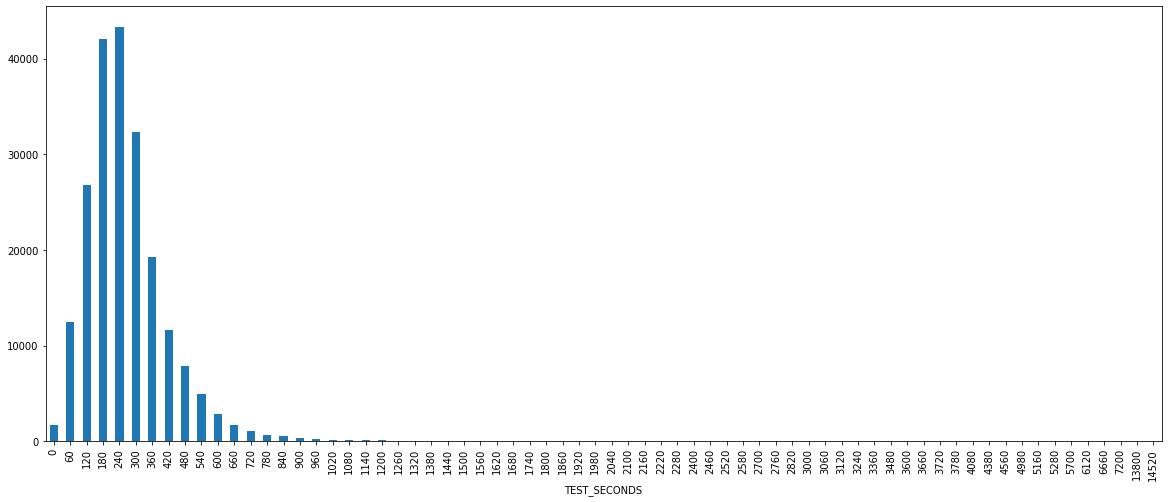

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
inter_df.groupby('TEST_SECONDS').size().plot.bar()

#### the typical duration of a test is four minutes. there are a few outliers (duration of several hours)

### by time of the day

#### let's do a simplistic division into four equally long timeframes to get started 

In [0]:
time_df = df.set_index('TEST_SDATE')

In [0]:
morning = ['6:00', '11:59']
afternoon = ['12:00', '17:59']
evening = ['18:00', '23:59']
night = ['0:00', '5:59']

morning_tests = time_df.between_time(morning[0], morning[1])
afternoon_tests = time_df.between_time(afternoon[0], afternoon[1])
evening_tests = time_df.between_time(evening[0], evening[1])
night_tests = time_df.between_time(night[0], night[1])

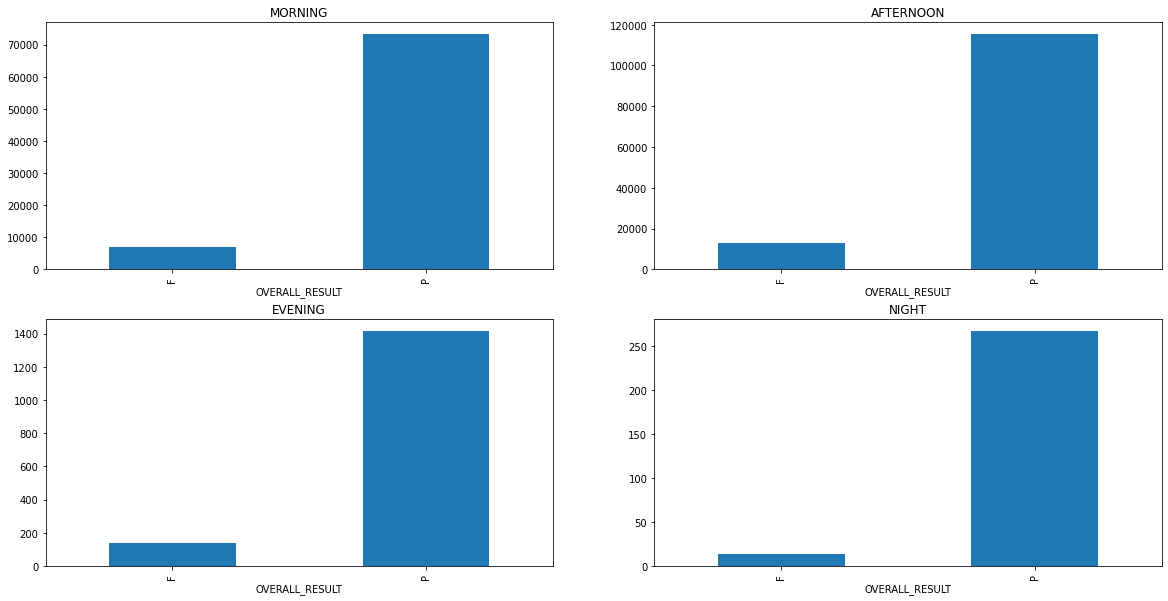

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
morning_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[0,0], title='MORNING')
afternoon_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[0,1], title='AFTERNOON')
evening_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1,0], title='EVENING')
night_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1,1], title='NIGHT', stacked=True)

In [0]:
print('Morning: {:.2f} percent fail'.format(len(morning_tests[morning_tests.OVERALL_RESULT == 'F'])/len(morning_tests)))
print('Afternoon: {:.2f} percent fail'.format(len(afternoon_tests[afternoon_tests.OVERALL_RESULT == 'F'])/len(afternoon_tests)))
print('Evening: {:.2f} percent fail'.format(len(evening_tests[evening_tests.OVERALL_RESULT == 'F'])/len(evening_tests)))
print('Night: {:.2f} percent fail'.format(len(night_tests[night_tests.OVERALL_RESULT == 'F'])/len(night_tests)))

Morning: 0.09 percent fail
Afternoon: 0.10 percent fail
Evening: 0.09 percent fail
Night: 0.05 percent fail


#### the fail rate for nightly tests is very low. what about aborts?

In [0]:
time_df_a = df_w_abort.set_index('TEST_SDATE')

In [0]:
morning = ['6:00', '11:59']
afternoon = ['12:00', '17:59']
evening = ['18:00', '23:59']
night = ['0:00', '5:59']

morning_tests = time_df_a.between_time(morning[0], morning[1])
afternoon_tests = time_df_a.between_time(afternoon[0], afternoon[1])
evening_tests = time_df_a.between_time(evening[0], evening[1])
night_tests = time_df_a.between_time(night[0], night[1])

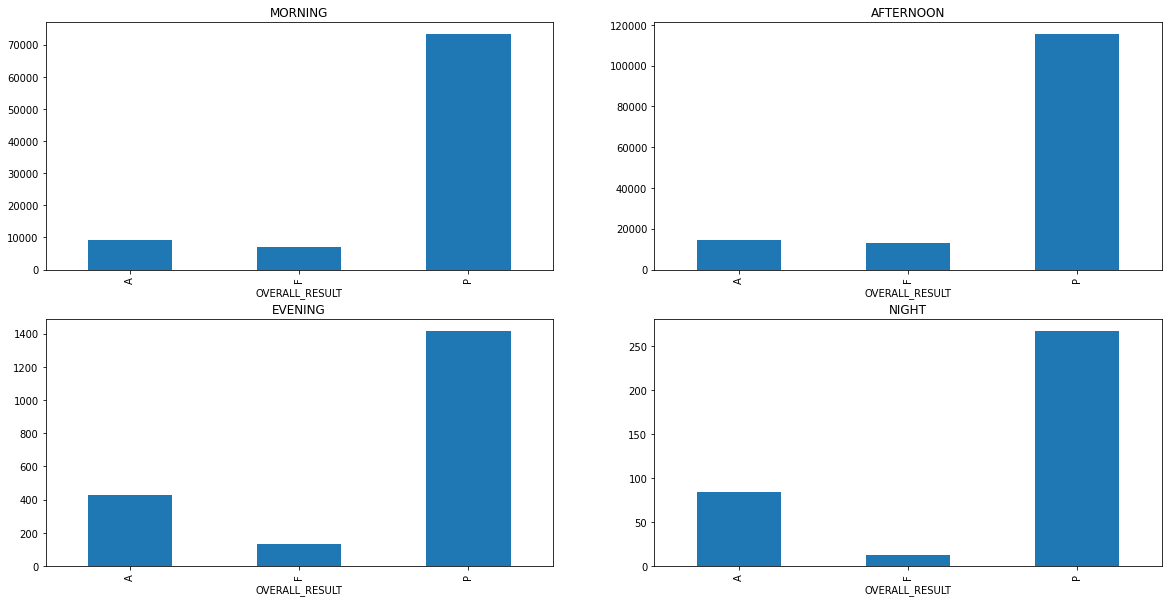

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
morning_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[0,0], title='MORNING')
afternoon_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[0,1], title='AFTERNOON')
evening_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1,0], title='EVENING')
night_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1,1], title='NIGHT'

In [0]:
print('Morning: {:.2f} percent fail'.format(len(morning_tests[morning_tests.OVERALL_RESULT == 'A'])/len(morning_tests)))
print('Afternoon: {:.2f} percent fail'.format(len(afternoon_tests[afternoon_tests.OVERALL_RESULT == 'A'])/len(afternoon_tests)))
print('Evening: {:.2f} percent fail'.format(len(evening_tests[evening_tests.OVERALL_RESULT == 'A'])/len(evening_tests)))
print('Night: {:.2f} percent fail'.format(len(night_tests[night_tests.OVERALL_RESULT == 'A'])/len(night_tests)))

Morning: 0.10 percent fail
Afternoon: 0.10 percent fail
Evening: 0.22 percent fail
Night: 0.23 percent fail


#### the rate for aborts is very high in the evening and at night. why?

## Calculate car age

In [0]:
df['AGE'] = pd.to_datetime(df["TEST_EDATE"]).dt.year - df["MODEL_YEAR"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


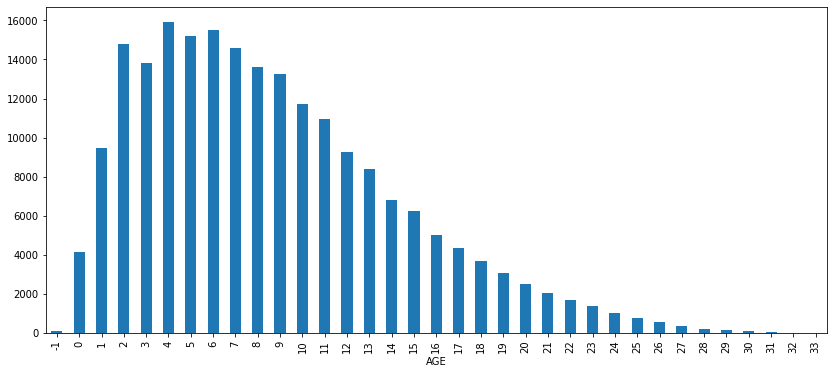

In [0]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('AGE').size().plot.bar()

In [0]:
df['AGE'] += 1

#### let's look at test results by model year / age

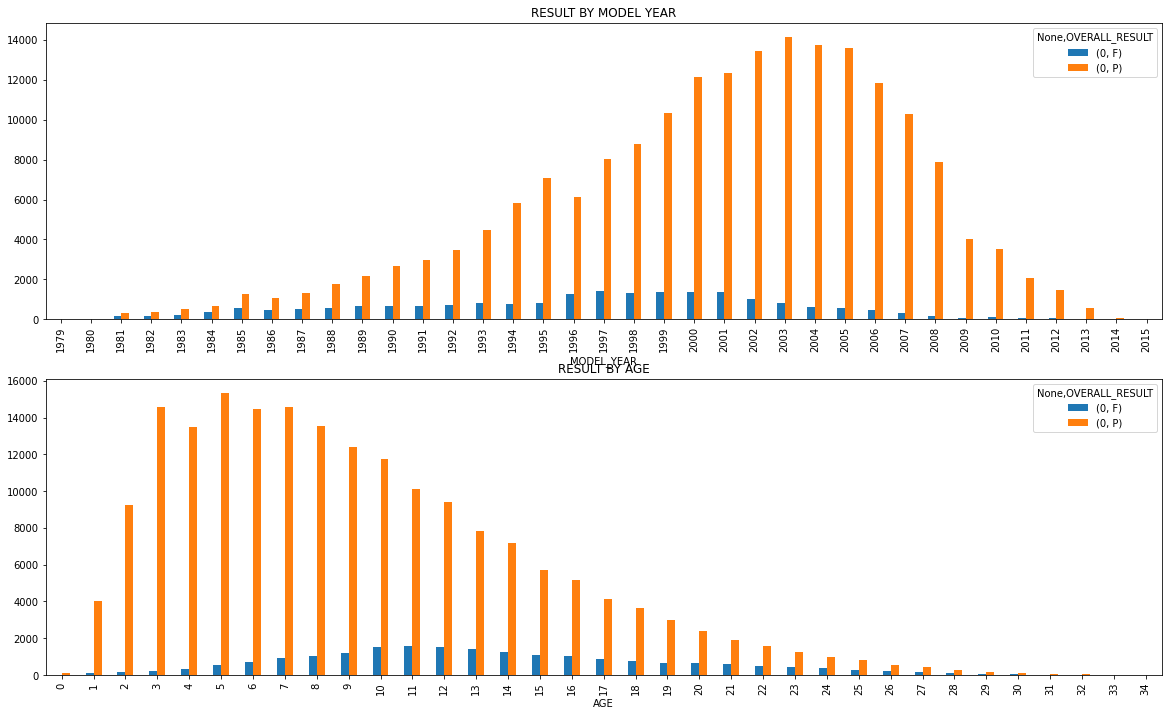

In [0]:
fig, ax = plt.subplots(2, 1, figsize=(20,12))
pd.DataFrame(df.groupby(['MODEL_YEAR','OVERALL_RESULT']).size()).unstack().fillna(0).plot.bar(ax=ax[0], title='RESULT BY MODEL YEAR')
pd.DataFrame(df.groupby(['AGE','OVERALL_RESULT']).size()).unstack().fillna(0).plot.bar(ax=ax[1], title='RESULT BY AGE')

#### normalize by group to see the ratios more clearly 

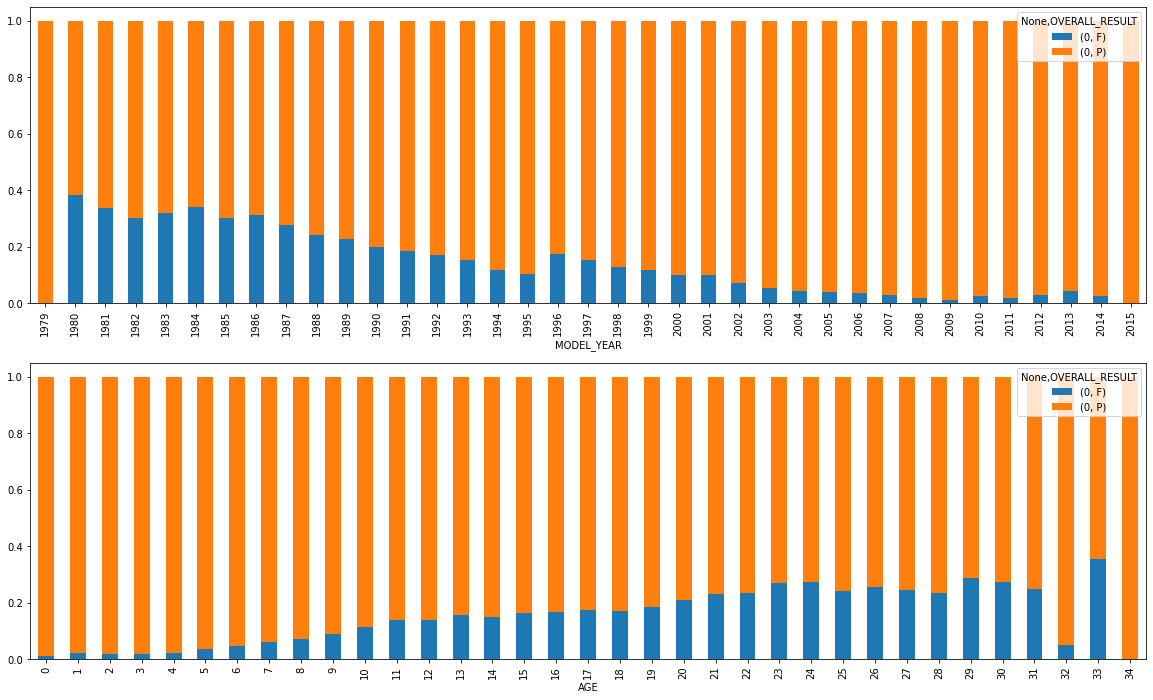

In [0]:
fig, ax = plt.subplots(2, 1, figsize=(20,12))
pd.DataFrame(df.groupby(['MODEL_YEAR','OVERALL_RESULT']).size()/df.groupby('MODEL_YEAR').size()).unstack().fillna(0).plot.bar(ax=ax[0], stacked=True)
pd.DataFrame(df.groupby(['AGE','OVERALL_RESULT']).size()/df.groupby('AGE').size()).unstack().fillna(0).plot.bar(ax=ax[1], stacked=True)

In [0]:
len(df[df.AGE == 30]), len(df[df.AGE == 31]), len(df[df.AGE == 32]), len(df[df.AGE == 33]), len(df[df.AGE == 34])

(162, 89, 39, 17, 2)

#### why do very young vehicles fail the test? (open question)

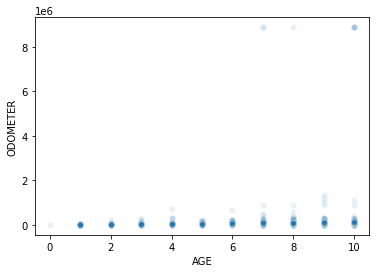

In [0]:
sns.scatterplot(data=df[(df.AGE < 11) & (df.OVERALL_RESULT == 'F')], x='AGE', y='ODOMETER', alpha=.1)

## odometer

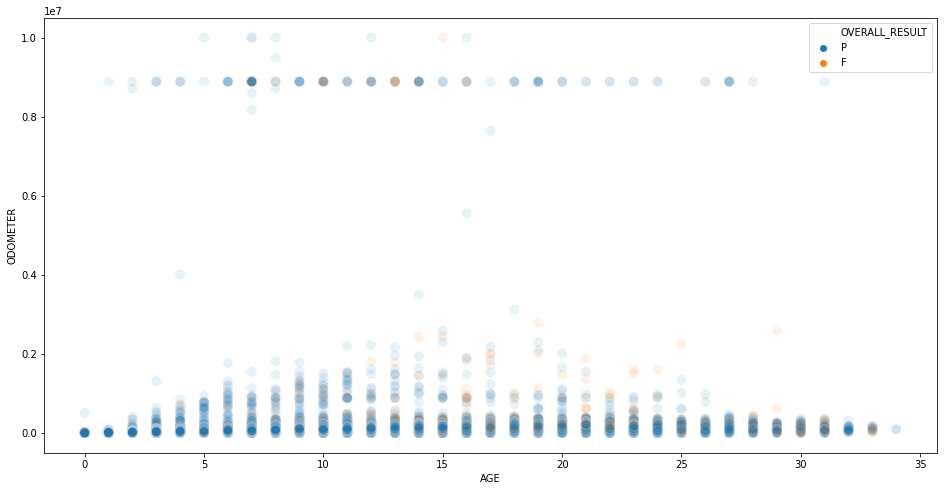

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=df, x='AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)

In [0]:
len(df[df.ODOMETER.isna()]), len(df[df.ODOMETER == 0])

(0, 334)

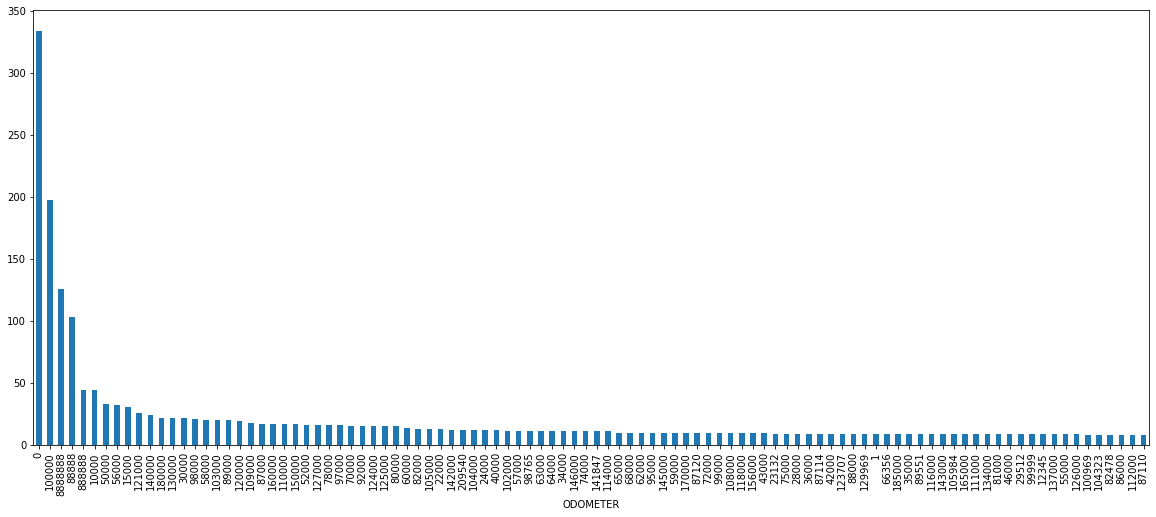

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
df.groupby('ODOMETER').size().sort_values(ascending=False).head(100).plot.bar()

#### exclude impossible values to see the pattern more clearly 

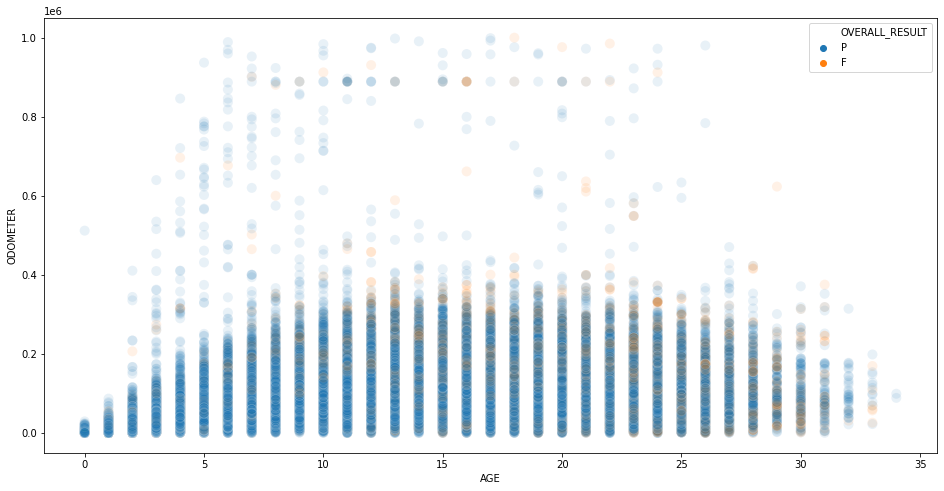

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=df[(df.ODOMETER < 1000000) & (df.ODOMETER > 0)], x='AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)

#### are strange values used by the same people / at the same stations?

In [0]:
df['MECHANIC_LAST_NAME'] = df.MECHANIC_LAST_NAME.str.capitalize()
df['MECHANIC_FIRST_NAME'] = df.MECHANIC_FIRST_NAME.str.capitalize()
df['MECHANIC_NAME'] = df.MECHANIC_FIRST_NAME + '_' + df.MECHANIC_MIDDLE_INIT + '_' + df.MECHANIC_LAST_NAME

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

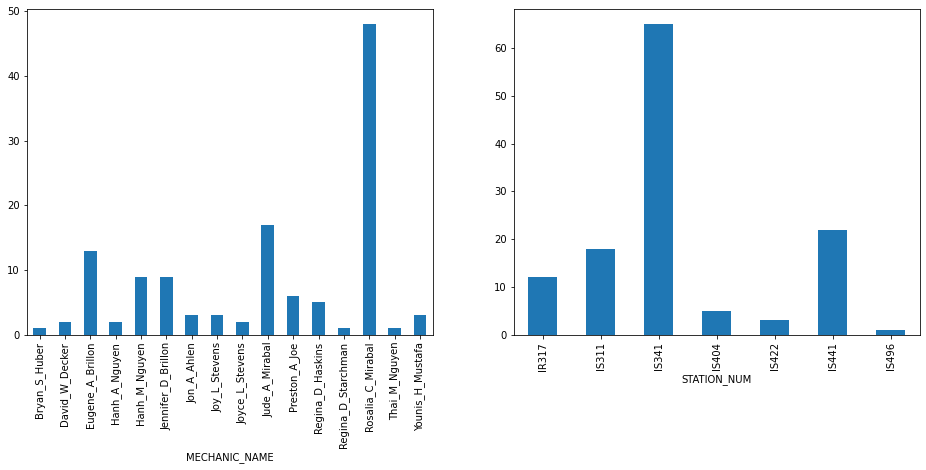

In [0]:
#df[df.ODOMETER.astype(str).str.match('8{5,7}')].groupby('ANALYZER_NUM').size().plot.bar()
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 8888888].groupby('MECHANIC_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 8888888].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

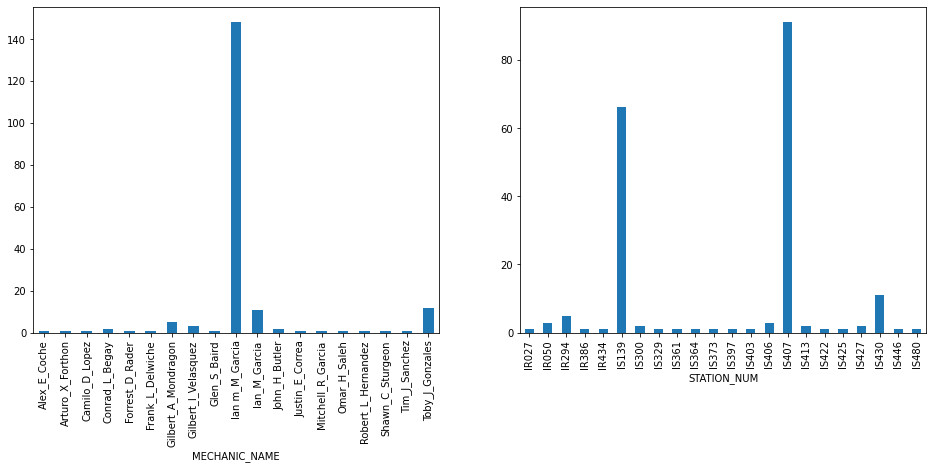

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df[df.ODOMETER == 100000].groupby('MECHANIC_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 100000].groupby('STATION_NUM').size().plot.bar(ax=axs[1])

In [0]:
garcia_df = df[df.MECHANIC_NAME == 'Ian m_M_Garcia']
dupl_df = garcia_df[garcia_df.duplicated('ODOMETER', keep=False)]
dupl_df.ODOMETER

10642     50000
10796     89000
11074     30000
11336     55000
11506     80000
          ...  
83802    100000
83960     75000
84002     27000
84137     10000
84303     67000
Name: ODOMETER, Length: 436, dtype: int64

#### this mechanic seems to use the 100000 more often for failing cars. but not exclusively

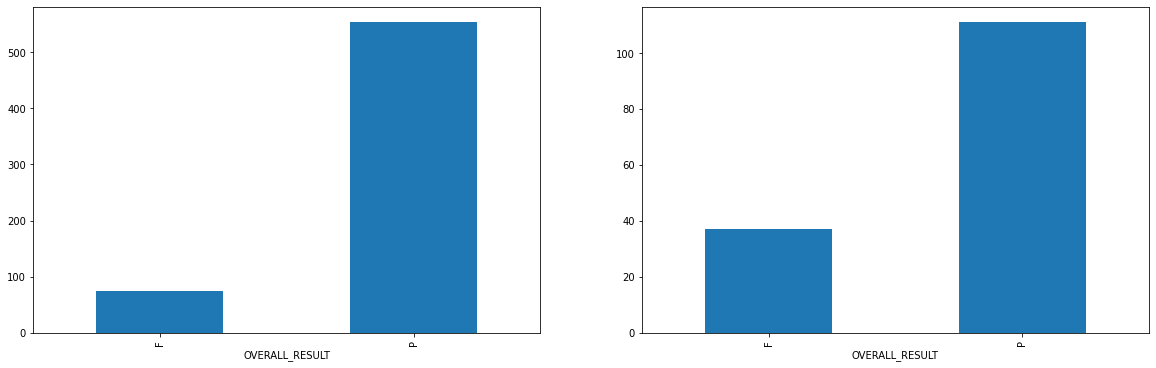

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))
df[(df.MECHANIC_NAME == 'Ian m_M_Garcia')].groupby('OVERALL_RESULT').size().plot.bar(ax = axs[0])
df[(df.MECHANIC_NAME == 'Ian m_M_Garcia') & (df.ODOMETER == 100000)].groupby('OVERALL_RESULT').size().plot.bar(ax = axs[1])

#### this stations does not seem to follow any pattern related to fails or passes when using the strange value

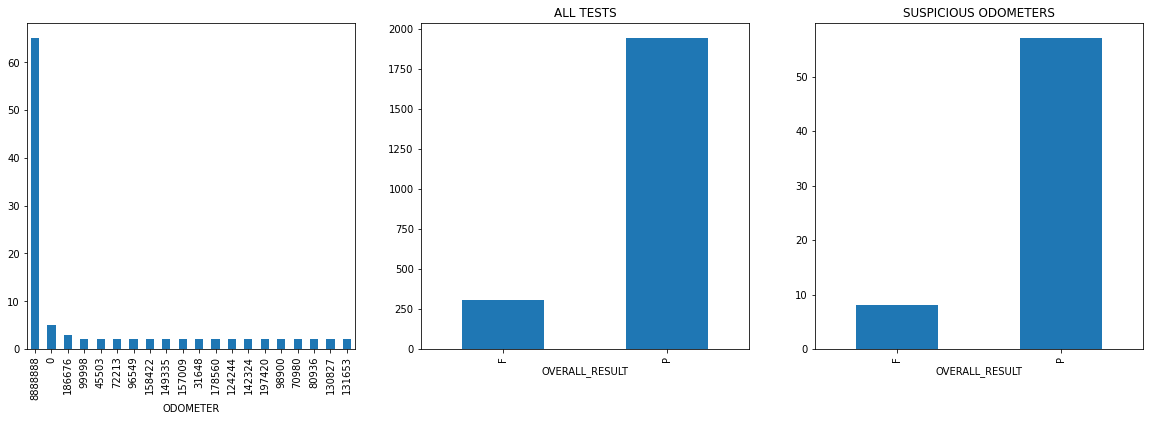

In [0]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))
df[df.STATION_NUM == 'IS341'].groupby('ODOMETER').size().sort_values(ascending=False).head(20).plot.bar(ax=axs[0])
df[df.STATION_NUM == 'IS341'].groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1], title='ALL TESTS')
df[(df.STATION_NUM == 'IS341') & (df.ODOMETER == 8888888)].groupby('OVERALL_RESULT').size().plot.bar(ax=axs[2], title='SUSPICIOUS ODOMETERS')

## VID_TEST_TYPE

#### not an interesting variable

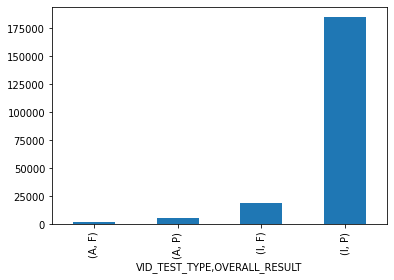

In [0]:
df.groupby(['VID_TEST_TYPE', 'OVERALL_RESULT']).size().plot.bar()

##VEHICLE TYPE, GWR, GVWR 

#### fails and passes are very evenly distributed over the different vehicle types

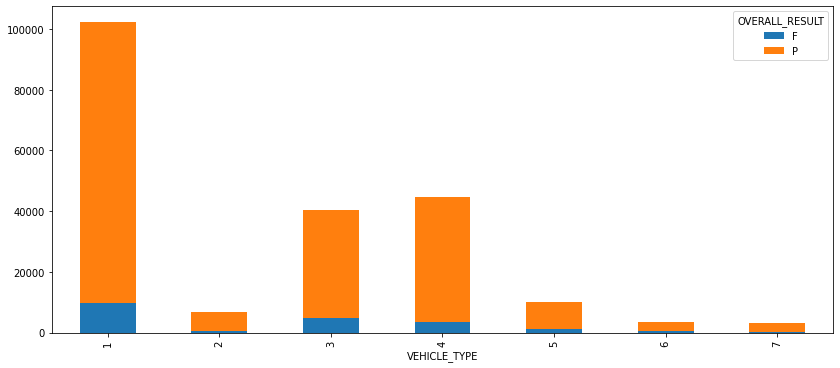

In [0]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby(['VEHICLE_TYPE', 'OVERALL_RESULT']).size().unstack().plot.bar(stacked=True, ax=ax)

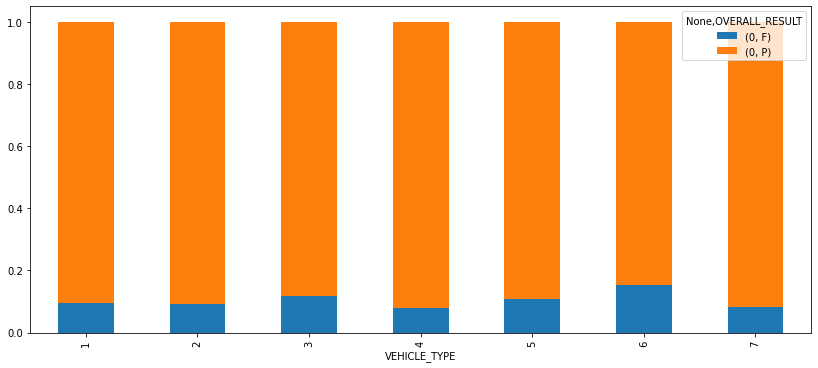

In [0]:
fig, ax = plt.subplots(figsize=(14,6))
pd.DataFrame(df.groupby(['VEHICLE_TYPE', 'OVERALL_RESULT']).size()/df.groupby('VEHICLE_TYPE').size()).unstack().plot.bar(stacked=True, ax=ax)

#### what about aborts? (same, but it introduces the 0, or nan value)

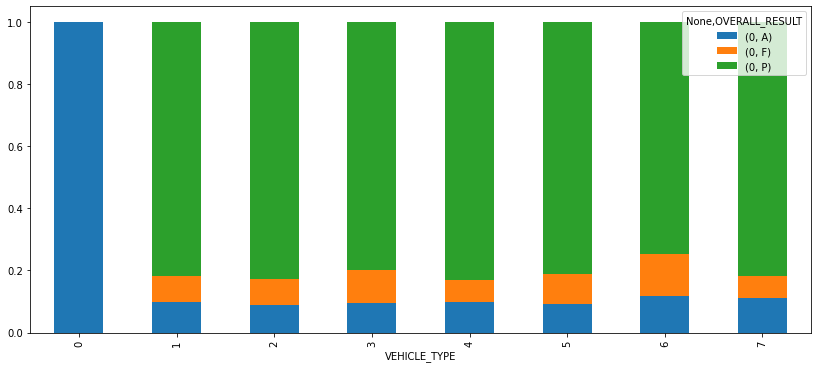

In [0]:
fig, ax = plt.subplots(figsize=(14,6))
pd.DataFrame(df_w_abort.groupby(['VEHICLE_TYPE', 'OVERALL_RESULT']).size()/df_w_abort.groupby('VEHICLE_TYPE').size()).unstack().plot.bar(stacked=True, ax=ax)

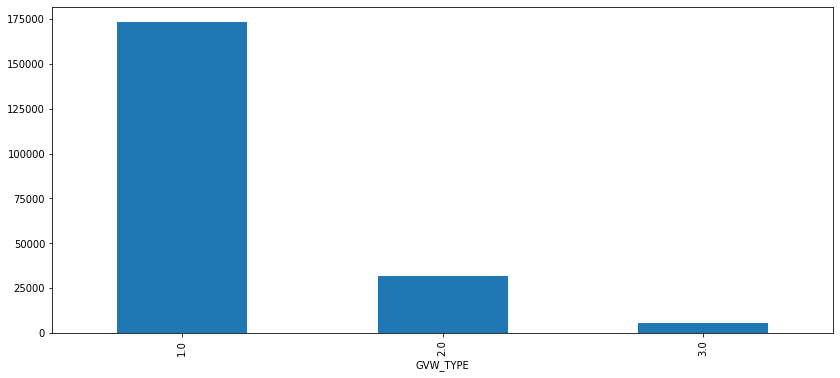

In [0]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('GVW_TYPE').size().plot.bar()

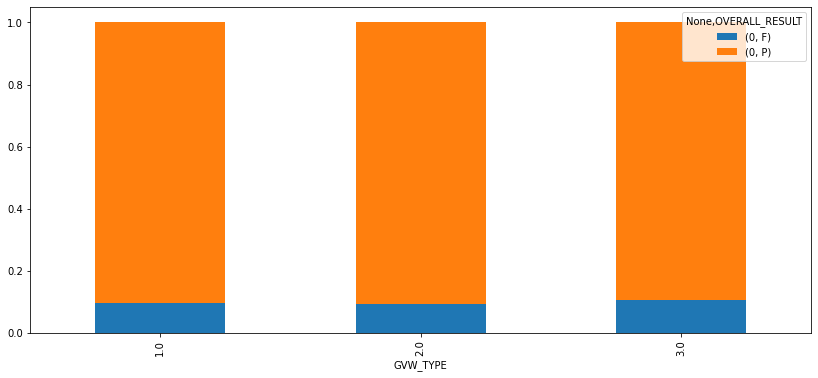

In [0]:
fig, ax = plt.subplots(figsize=(14,6))
pd.DataFrame(df.groupby(['GVW_TYPE', 'OVERALL_RESULT']).size()/df.groupby('GVW_TYPE').size()).unstack().plot.bar(stacked=True, ax=ax)

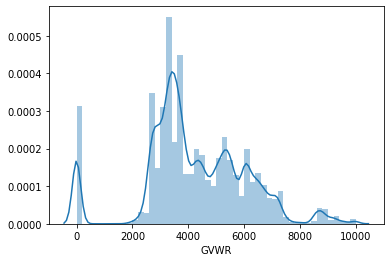

In [0]:
sns.distplot(df.GVWR)

In [0]:
len(df[df.GVWR == 0])

13233

In [0]:
len(df[df.GVWR == 0 & df.GVW_TYPE.isna()])

13233

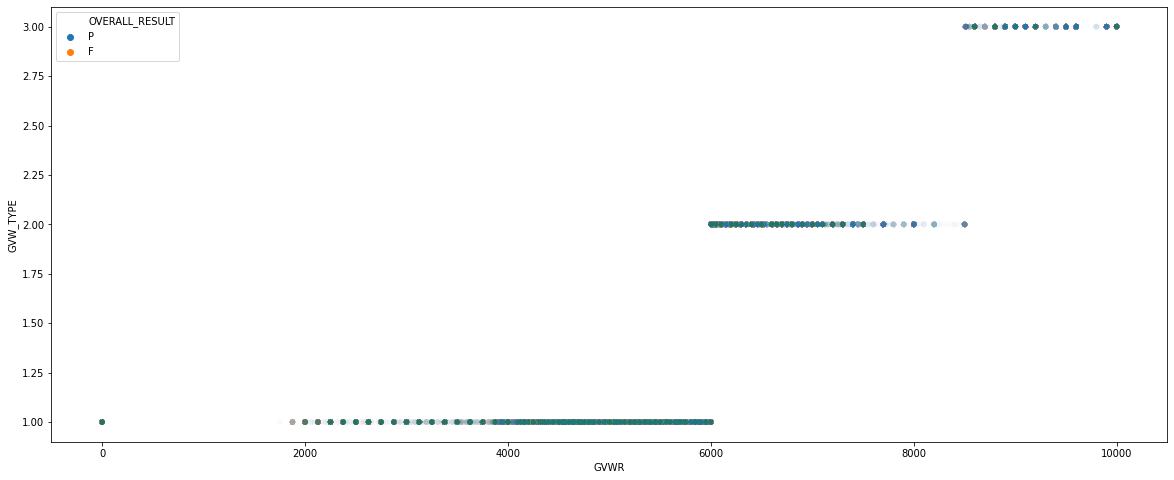

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=df, x='GVWR', y='GVW_TYPE', alpha=.01, hue='OVERALL_RESULT')

### FUEL TYPE

#### diesels pass as often as gas-fueled cars. 'L' has only 10 datapoints and is therefore not representative

In [0]:
df.groupby('FUEL_TYPE').size()

FUEL_TYPE
B        14
D       333
G    210047
L        10
N        16
X       255
dtype: int64

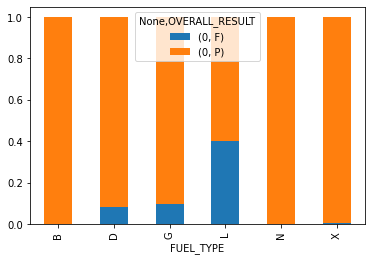

In [0]:
pd.DataFrame(df.groupby(['FUEL_TYPE', 'OVERALL_RESULT']).size()/df.groupby('FUEL_TYPE').size()).unstack().plot.bar(stacked=True)

In [0]:
round(len(df[df.FUEL_TYPE == 'L']) / len(df), 10)

4.74665e-05

## ZIP CODE

#### let's look at the zip codes. the first thing to notice is that they have different types: ints, floats and even strings (0, 8710, 87, '-8710' and '8710-' are used to represent nans)


In [0]:
df.groupby('ZIP_CODE').size().sort_values(ascending=False).head(15)

ZIP_CODE
87110.0    14161
87108.0    12680
87111.0    10855
87114.0    10796
87107.0     9944
87109.0     9942
87112.0     9732
87105.0     9378
87121.0     9044
87123.0     8146
87120.0     7145
87121       6882
87108       6637
87114       6557
87110       6274
dtype: int64

In [0]:
df[df.ZIP_CODE.isin(['-8710', '8710-', 0, 8710, 87])].head()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE,AGE,MECHANIC_NAME,ZIP_CODE_IMP
404,4335453.0,IR106,W074,4924231,2004-09-03 17:16:00,2004-09-03 17:30:00,JHMBB5236FC004650,M,FYA944,1.0,2625,1985,HONDA,PRELUDE,4,2000,M,N,132005,G,1,87,F,3.0,850428,NaN,140.0,NaN,F,NaN,Moya,Jerry,G,NaN,I,20,Jerry_G_Moya,87
2837,4487786.0,IS309,W078,11714840,2004-12-18 15:34:00,2004-12-18 15:36:00,1FMRU15L0YLC44256,S,NPC44256,2.0,7000,2000,FORD,EXPEDITION,8,5400,A,N,69434,G,4,87,F,20.0,0,NaN,147.0,NaN,P,NaN,Anderson,Michael,S,5.4L,I,5,Michael_S_Anderson,87
3680,4421413.0,IR203,W047,34000651,2004-07-14 11:32:00,2004-07-14 11:49:00,1GDDM19Z7RB506564,S,213LCL,1.0,4000,1994,GMC,SAFARI,6,4300,A,N,100786,G,5,87,F,11.0,941506,NaN,140.0,NaN,P,NaN,Decoursey,Scott,NaN,NaN,I,11,NaN,87
6195,4390558.0,IR106,W074,6515398,2004-11-08 12:48:00,2004-11-08 12:56:00,1G2HX53L5N1242922,M,NP242922,1.0,3375,1992,PONTIAC,BONNEVILLE,6,3800,A,N,18062,G,1,0,F,5.0,920349,NaN,141.0,NaN,P,NaN,Moya,Phil,NaN,NaN,I,13,NaN,0
6461,4472320.0,IS309,W078,11714840,2004-12-07 14:46:00,2004-12-07 14:54:00,2GDHG31KXK4520207,M,DPG175,3.0,10000,1989,GMC,G3500 VANDURA,8,5700,A,N,175526,G,6,87,F,18.0,890970,NaN,141.0,NaN,P,NaN,Anderson,Michael,S,NaN,I,16,Michael_S_Anderson,87


In [0]:
len(df[df.ZIP_CODE.isin(['-8710', '8710-', 0, 8710, 87])])

61

In [0]:
df['ZIP_CODE_IMP'] = df.ZIP_CODE.apply(lambda x: 0 if str(x)[-1] == '-' or str(x)[0] == '-' else x)
df['ZIP_CODE_IMP'] = df.ZIP_CODE_IMP.astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


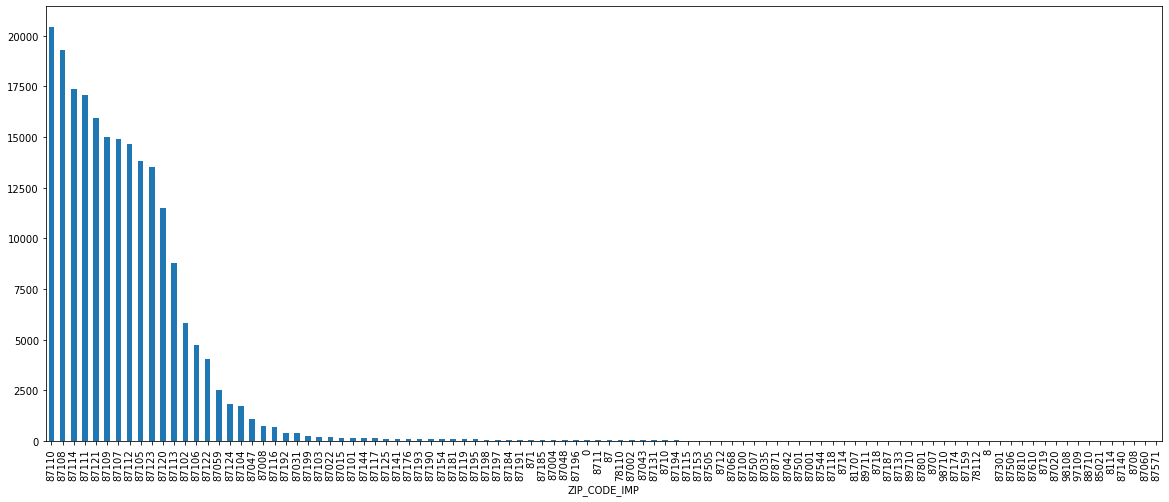

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
df.groupby('ZIP_CODE_IMP').size().sort_values(ascending=False).head(100).plot.bar()

#### there are two clusters: one around the city center (note how at the perifery, cars have a lower age) and one around the very low values (presumably all nans)

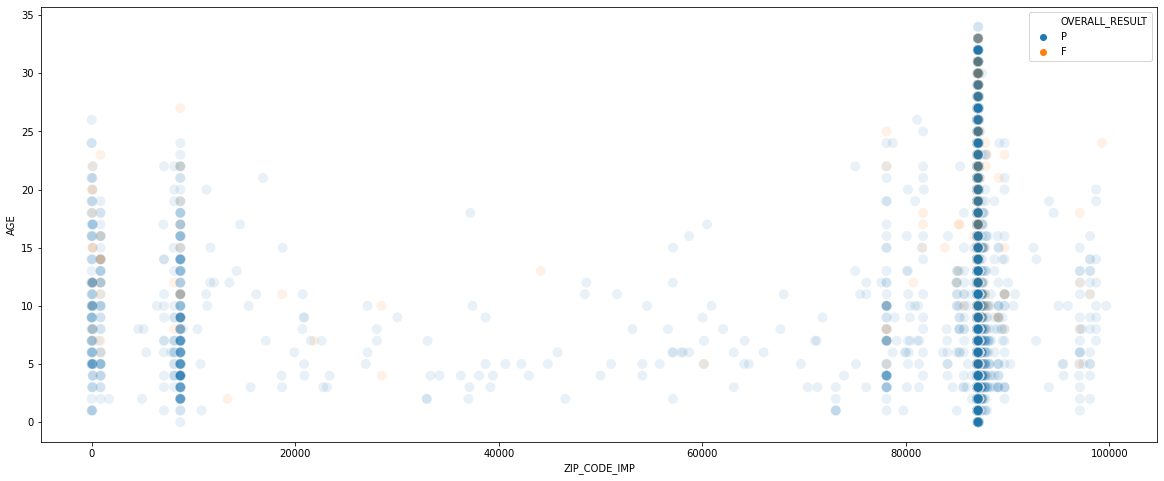

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=df, x='ZIP_CODE_IMP', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.1)

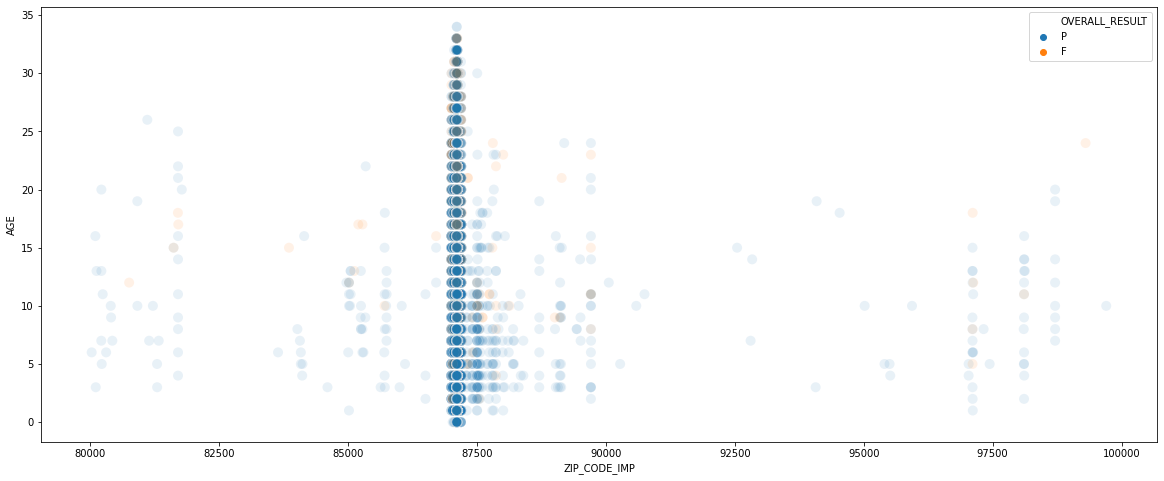

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=df[(df.ZIP_CODE_IMP >= 80000) & (df.ZIP_CODE_IMP <= 100000)], x='ZIP_CODE_IMP', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.1)

#### we could use this resource for income by zip code: https://newmexico.hometownlocator.com/zip-codes/zipcodes,city,albuquerque.cfm

## ESC

#### let's look at ESC again. we have already hypothesized that this is an interesting variale (even though we don't know what it stands for), and that seems to be true. the patterns for the target variable differ greatly among ESC classes (note, however, that some have very low numbers and might not be representative)

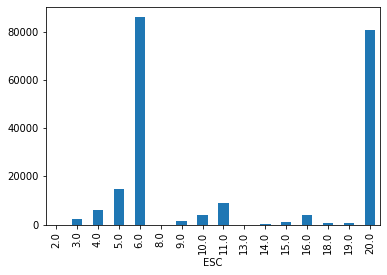

In [0]:
df.groupby('ESC').size().plot.bar()

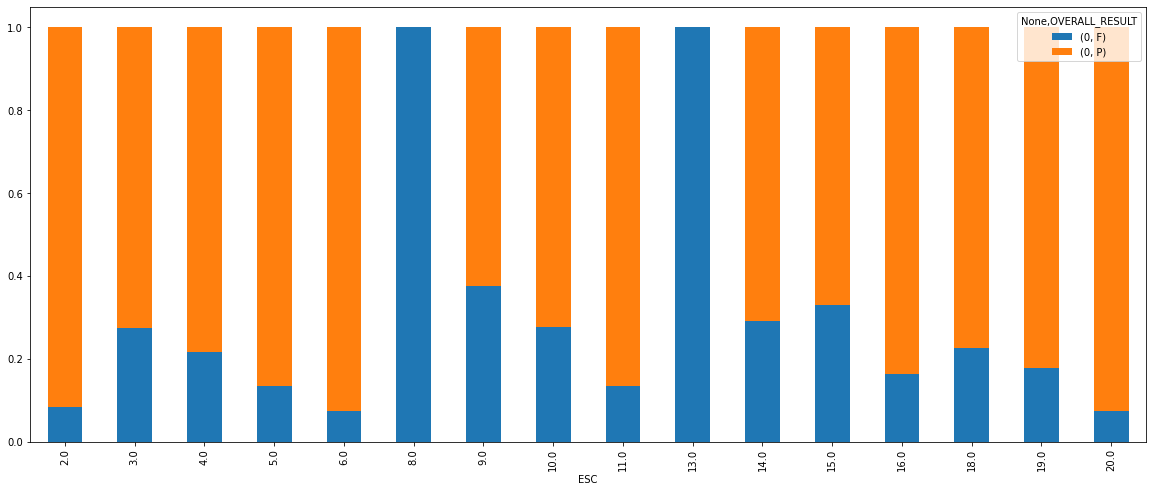

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
pd.DataFrame(df.groupby(['ESC', 'OVERALL_RESULT']).size()/df.groupby('ESC').size()).unstack().plot.bar(ax=ax, stacked=True)

#### there is a funny pattern by age

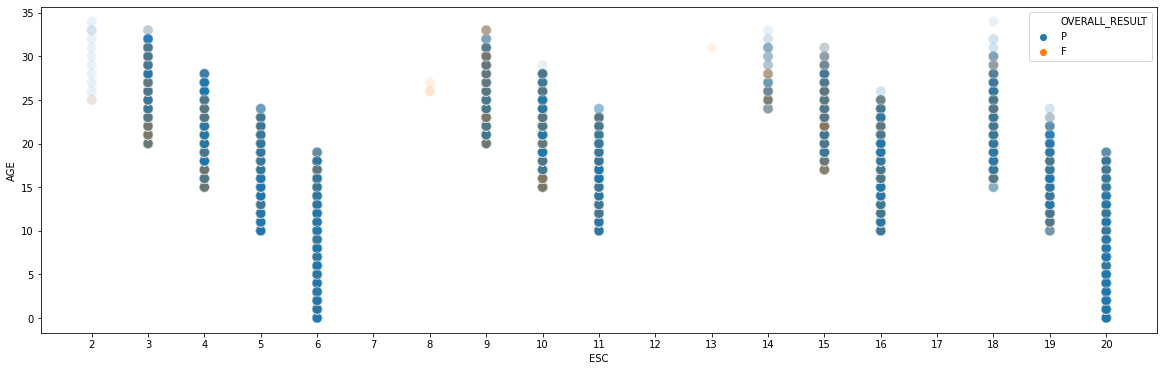

In [0]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(ticks=range(1,21))
sns.scatterplot(data=df, x='ESC', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.1)

#### some classes seem more likely to fail even with low odometer values (9, 14, 15?)

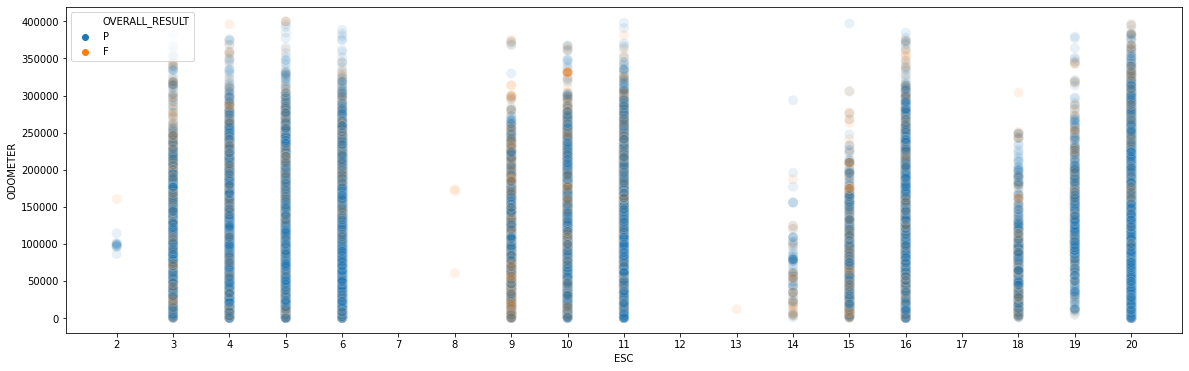

In [0]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(ticks=range(1,21))
sns.scatterplot(data=df[df.ODOMETER < 400000], x='ESC', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)

## MODEL & MAKE

#### maybe it's enough to include a few highly represented brand and group the others under one label 

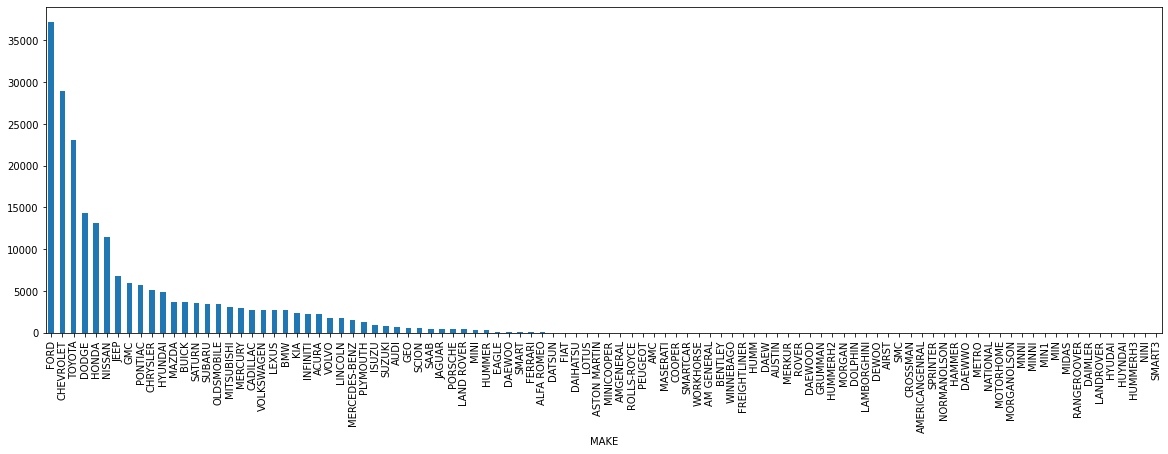

In [0]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('MAKE').size().sort_values(ascending=False).head(100).plot.bar()

In [0]:
gb = df.groupby('MAKE')#.size().sort_values(ascending=False).head(100)
size = gb.size()
size[size > 100].index

Index(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER',
       'DODGE', 'EAGLE', 'FORD', 'GEO', 'GMC', 'HONDA', 'HUMMER', 'HYUNDAI',
       'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA', 'LAND ROVER', 'LEXUS',
       'LINCOLN', 'MAZDA', 'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SCION', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'],
      dtype='object', name='MAKE')

In [0]:
frequent_cars = df[df.MAKE.isin(size[size >= 500].index)]

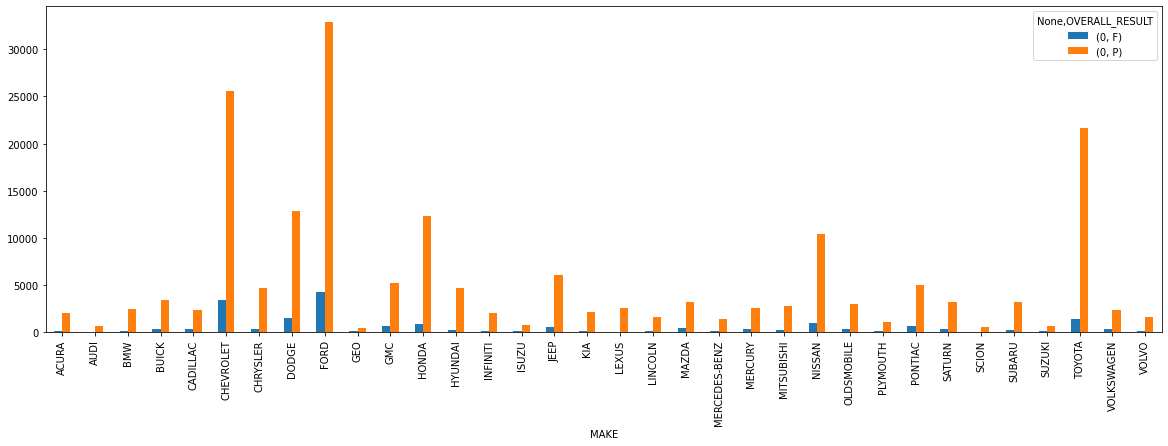

In [0]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_cars.groupby(['MAKE', 'OVERALL_RESULT']).size()).unstack().plot.bar(ax=ax)

#### some brands seem to fail more often than others. need to look into the absolute numbers and how representative these ratios are (note that only brands with more than 500 datapoints are included) 

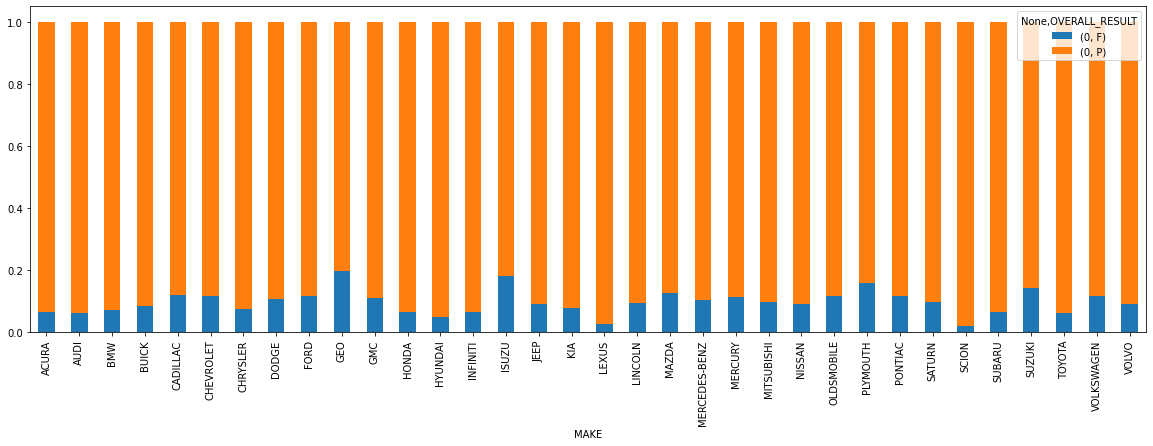

In [0]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_cars.groupby(['MAKE', 'OVERALL_RESULT']).size()/frequent_cars.groupby('MAKE').size()).unstack().plot.bar(ax=ax, stacked=True)

#### plymouth and geo are old cars, subaru, saturn, scion and kia are newer

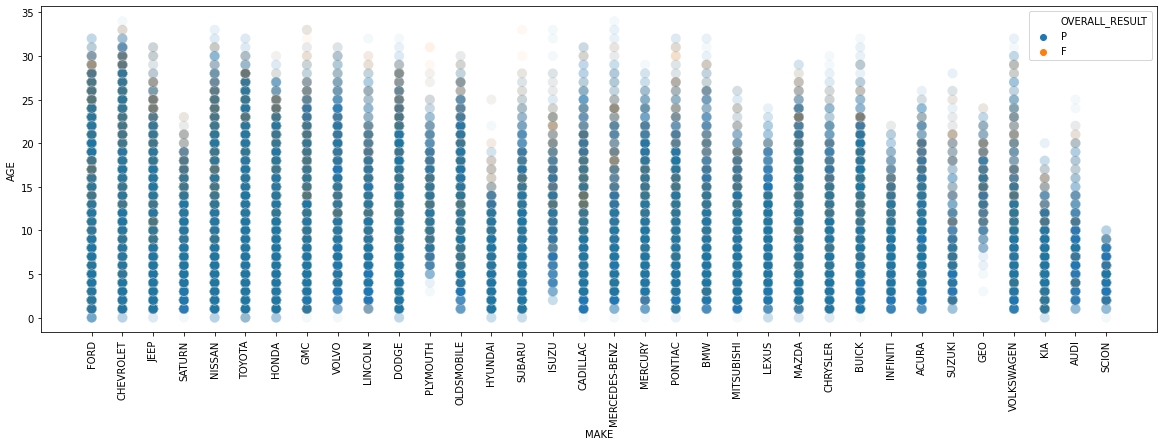

In [0]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation=90)
sns.scatterplot(data=frequent_cars, x='MAKE', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.05)

#### lots of fords in the 8888888 group

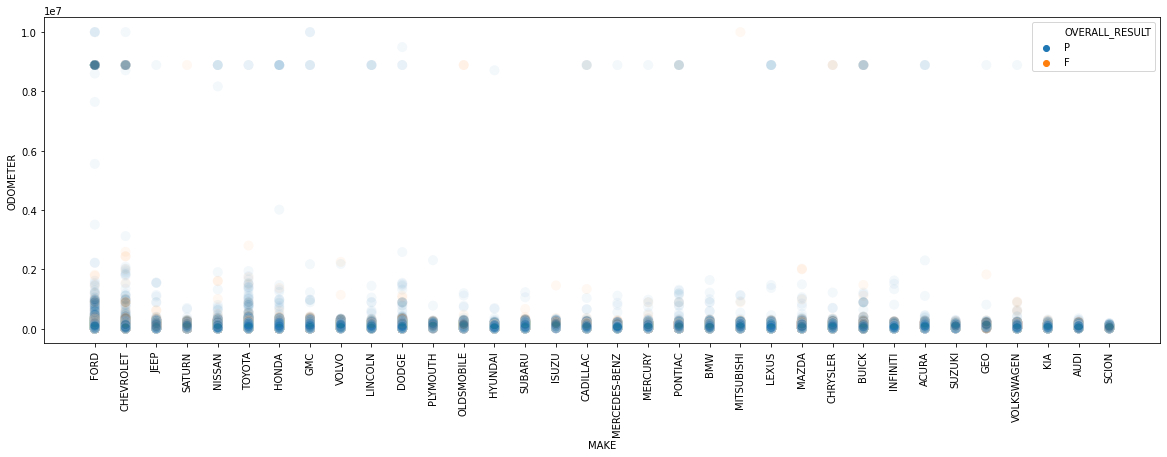

In [0]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation=90)
sns.scatterplot(data=frequent_cars, x='MAKE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.05)

In [0]:
len(df[df.ODOMETER == 8888888]), len(df[(df.MAKE == 'FORD') & (df.ODOMETER == 8888888)]), len(df[(df.MAKE == 'CHEVROLET') & (df.ODOMETER == 8888888)])

(126, 47, 19)

In [0]:
df[df.ODOMETER == 8888888].groupby('MAKE').size().sort_values(ascending=False)

MAKE
FORD             47
CHEVROLET        19
BUICK             9
HONDA             7
PONTIAC           6
LEXUS             5
NISSAN            4
CADILLAC          4
LINCOLN           4
ACURA             3
GMC               3
CHRYSLER          3
DODGE             2
OLDSMOBILE        2
TOYOTA            2
VOLKSWAGEN        1
GEO               1
MERCEDES-BENZ     1
MERCURY           1
SATURN            1
JEEP              1
dtype: int64

#### fords seem to be able to rack up a higher odometer count (but they are also the largest group)

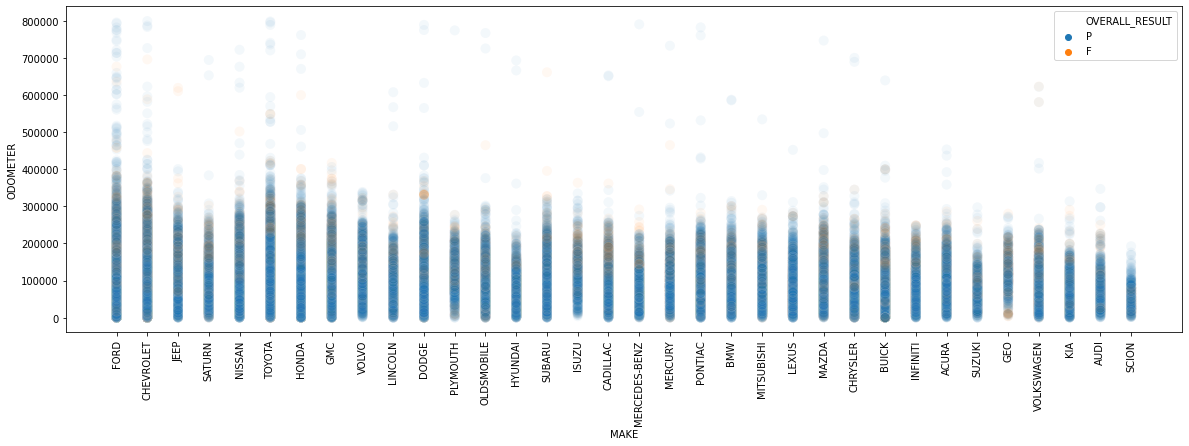

In [0]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation=90)
sns.scatterplot(data=frequent_cars[frequent_cars.ODOMETER < 800000], x='MAKE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.05)

In [0]:
df[df.ODOMETER == 100000].groupby('MAKE').size().sort_values(ascending=False)

MAKE
FORD             39
CHEVROLET        32
TOYOTA           19
HONDA            18
NISSAN           10
DODGE             8
PONTIAC           7
JEEP              6
MERCURY           6
CHRYSLER          5
GMC               5
PLYMOUTH          5
OLDSMOBILE        4
VOLVO             3
LINCOLN           3
MAZDA             3
MITSUBISHI        3
SATURN            3
MERCEDES-BENZ     3
BUICK             2
CADILLAC          2
BMW               2
ACURA             2
GEO               2
ISUZU             2
JAGUAR            1
VOLKSWAGEN        1
SUBARU            1
LEXUS             1
dtype: int64